In [1]:
import tensorflow as tf
import numpy as np

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from scipy.misc import  imresize
print(tf.__version__)

2.8.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

image = train_images[0]
original_size = 28
target_size = 200
up_sampling_size = 84
    
up_sampling_image = imresize(image.reshape(28,28),(up_sampling_size,up_sampling_size),interp="nearest")
phase_image_padded = np.pad(up_sampling_image,   # pad the phase image with 0's
                                int((target_size-up_sampling_size)/2),
                                mode='constant',constant_values=0)

phase_image = np.exp(1j*2.0*np.pi*phase_image_padded)   # convert to phase image


c:\users\cheng\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  


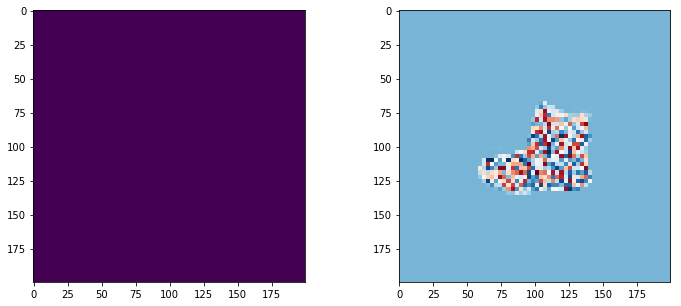

In [5]:
rows, cols = 1 ,2
fig = plt.figure(figsize=(12,5))

fig.add_subplot(rows,cols,1)
plt.imshow(np.absolute(phase_image))

fig.add_subplot(rows,cols,2)
plt.imshow(np.angle(phase_image),cmap='RdBu')

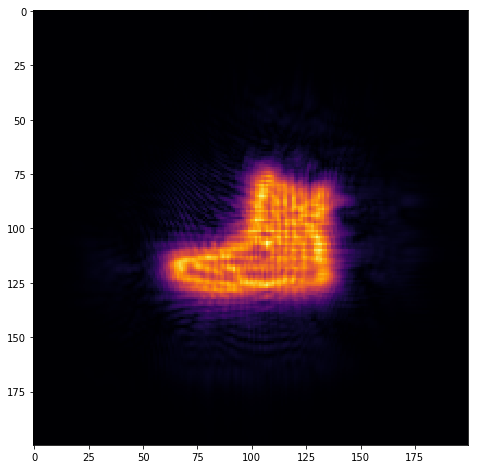

In [11]:
N = 200              # field array size
L = 0.08             # source and observation plane side length, field of view, unit: meter
dx = L/N
x = np.arange(-L/2,L/2,dx)
fx = np.arange(-1/(2*dx),1/(2*dx),1/L)
[FX, FY] = np.meshgrid(fx,fx)
        
lmb = 0.4e-3         # wavelength of the optical wave,unit: meter
z = 0.03             # distance of propagation(the distance bewteen two layers), unit: meter
k = 2.0*np.pi/lmb    # wave number

u0 = phase_image_padded
kz = np.sqrt(k**2-np.square(2*np.pi*FX)-np.square(2*np.pi*FY))
H = np.exp(1j*z*kz)
H = tf.cast(H,dtype=tf.complex64)
u1 = tf.signal.ifft2d(tf.signal.fft2d(u0)*tf.signal.fftshift(H))

plt.figure(figsize=(8,8))
plt.imshow(np.abs(u1),cmap='inferno')